In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from sklearn.datasets import make_blobs
# from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,GaussianNoise
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

<font size=5>gene expression dataset</font>

In [17]:
df1 = pd.read_csv('data/Methylation/methylation.csv',sep=',')
df1.head()

/Users/meimei/miniconda3/envs/DT/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Gene_Symbol,Chromosome,Genomic_Coordinate,TCGA-DK-AA6S-01A-21D-A392-05,TCGA-DK-A3IK-01A-32D-A21B-05,TCGA-CF-A9FM-01A-11D-A38H-05,TCGA-H4-A2HQ-01A-11D-A17Y-05,TCGA-FD-A3B8-01A-31D-A211-05,TCGA-GV-A3QI-01A-11D-A223-05,TCGA-E7-A97P-01A-11D-A38H-05,...,TCGA-KQ-A41O-01A-12D-A34V-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-FD-A5BV-01A-11D-A26N-05,TCGA-BL-A13J-01B-04D-A276-05,TCGA-BT-A2LA-11A-11D-A18G-05,TCGA-DK-AA6U-01A-11D-A392-05,TCGA-FD-A3SR-01A-11D-A231-05,TCGA-XF-A9T4-01A-11D-A392-05,TCGA-BT-A42E-01A-11D-A23V-05,TCGA-ZF-AA4X-01A-11D-A38H-05
0,RBL2,16,53468112,0.113423,0.099730,0.056009,0.060058,0.485065,0.148660,0.301325,...,0.140614,0.099374,0.068773,0.108752,0.134800,0.081517,0.213729,0.086982,0.311107,0.152444
1,C3orf35,3,37459206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FNDC3B,3,171916037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1,91194674,0.544652,0.148994,0.317977,0.918319,0.237931,0.940629,0.406879,...,0.868010,0.110602,0.136018,0.834700,0.239054,0.671883,0.810521,0.844741,0.745250,0.736126
4,VDAC3,8,42263294,0.885131,0.922959,0.920201,0.915577,0.819894,0.918234,0.903071,...,0.918984,0.899454,0.922760,0.925438,0.924799,0.904699,0.917183,0.902388,0.926466,0.938965


In [18]:
df1.shape

(485577, 443)

In [19]:
df1 = df1.drop(columns=['Gene_Symbol','Chromosome','Genomic_Coordinate'])

In [20]:
# reverse rows and columns
df1 = df1.T.reset_index()

In [21]:
df1.rename(columns = {"index":"barcode"},inplace = True)

In [23]:
df1

,barcode,0,1,2,3,4,5,6,7,8,...,485567,485568,485569,485570,485571,485572,485573,485574,485575,485576
0,TCGA-DK-AA6S-01A-21D-A392-05,0.113423,NaN,NaN,0.544652,0.885131,0.609589,0.770944,0.186264,0.136881,...,0.678325,0.013738,0.428950,0.012375,0.491295,0.448287,0.968589,0.972004,0.031403,0.695024
1,TCGA-DK-A3IK-01A-32D-A21B-05,0.099730,NaN,NaN,0.148994,0.922959,0.413294,0.372003,0.239830,0.120519,...,0.268836,0.011944,0.390979,0.249778,0.968720,0.954569,0.841370,0.486099,0.039529,0.941798
2,TCGA-CF-A9FM-01A-11D-A38H-05,0.056009,NaN,NaN,0.317977,0.920201,0.775024,0.835618,0.524901,0.076580,...,0.965567,0.971862,0.397083,0.014208,0.513809,0.949389,0.975109,0.031084,0.027022,0.950084
3,TCGA-H4-A2HQ-01A-11D-A17Y-05,0.060058,NaN,NaN,0.918319,0.915577,0.629948,0.414251,0.180653,0.116935,...,0.957051,0.959973,0.464705,0.964441,0.429494,0.026310,0.959222,0.599271,0.538583,0.323739
4,TCGA-FD-A3B8-01A-31D-A211-05,0.485065,NaN,NaN,0.237931,0.819894,0.602858,0.774802,0.311877,0.365804,...,0.022895,0.978635,0.433584,0.015292,0.510258,0.028341,0.970803,0.960043,0.505847,0.629377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,TCGA-DK-AA6U-01A-11D-A392-05,0.081517,NaN,NaN,0.671883,0.904699,0.565229,0.498607,0.192700,0.163877,...,0.479683,0.013308,0.934992,0.971824,0.971635,0.069478,0.967403,0.032046,0.469141,0.887821
436,TCGA-FD-A3SR-01A-11D-A231-05,0.213729,NaN,NaN,0.810521,0.917183,0.716093,0.294434,0.430439,0.144411,...,0.477764,0.018287,0.037344,0.422347,0.018703,0.453043,0.966045,0.058355,0.037629,0.960440
437,TCGA-XF-A9T4-01A-11D-A392-05,0.086982,NaN,NaN,0.844741,0.902388,0.725393,0.766345,0.570679,0.123828,...,0.461537,0.015342,0.929281,0.516270,0.476267,0.937414,0.542513,0.032574,0.032202,0.712569
438,TCGA-BT-A42E-01A-11D-A23V-05,0.311107,NaN,NaN,0.745250,0.926466,0.758472,0.867242,0.450476,0.253167,...,0.022032,0.974275,0.260706,0.739950,0.970554,0.962769,0.626702,0.662861,0.956191,0.413733


<font size=5>Patient dataset</font>

In [24]:
df2 = pd.read_csv('data/Methylation/patient_methy.csv',sep=';')
df2.shape

(440, 238)

In [25]:
df2

,Unnamed: 0,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,...,paper_focal.deletion.in.PTPRD,paper_focal.deletion.in.KDM6A,paper_Neoantigen.load,paper_HLA.mutation,paper_Fusion.in.FGFR3,paper_Fusion.in.PPARG,paper_Fusion.in.PTPN13,paper_Fusion.in.RHOA,paper_Fusion.in.TNFRSF21,paper_Fusion.in.ASIP
0,1,TCGA-DK-AA6S-01A-21D-A392-05,TCGA-DK-AA6S,TCGA-DK-AA6S-01A,TP,Primary solid Tumor,TCGA-DK-AA6S-01A,1,Not Reported,61cf45dc-21ec-40a3-a72b-3edd21895f6b,...,Loss,Del,1543.0,NaN,no,no,no,no,yes,no
1,2,TCGA-DK-A3IK-01A-32D-A21B-05,TCGA-DK-A3IK,TCGA-DK-A3IK-01A,TP,Primary solid Tumor,TCGA-DK-A3IK-01A,1,Not Reported,4ff20c48-29ee-4101-b409-c4573e38cf92,...,Loss,.,642.0,NaN,no,no,no,no,no,no
2,3,TCGA-CF-A9FM-01A-11D-A38H-05,TCGA-CF-A9FM,TCGA-CF-A9FM-01A,TP,Primary solid Tumor,TCGA-CF-A9FM-01A,1,Not Reported,282dcd5c-c35c-4b72-a3ab-571867e304d0,...,.,.,69.0,NaN,no,no,no,no,no,no
3,4,TCGA-H4-A2HQ-01A-11D-A17Y-05,TCGA-H4-A2HQ,TCGA-H4-A2HQ-01A,TP,Primary solid Tumor,TCGA-H4-A2HQ-01A,1,Not Reported,cbedc0db-39fd-4661-9531-cc24d422fac4,...,Del,.,1403.0,NaN,no,no,no,no,no,no
4,5,TCGA-FD-A3B8-01A-31D-A211-05,TCGA-FD-A3B8,TCGA-FD-A3B8-01A,TP,Primary solid Tumor,TCGA-FD-A3B8-01A,1,Not Reported,9a27aa84-d541-4fa3-a798-d7559a5ae70c,...,.,.,148.0,NaN,no,no,no,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,436,TCGA-DK-AA6U-01A-11D-A392-05,TCGA-DK-AA6U,TCGA-DK-AA6U-01A,TP,Primary solid Tumor,TCGA-DK-AA6U-01A,1,Not Reported,ccfee146-e91d-413a-8466-33efb4502990,...,Del,.,992.0,NaN,no,no,no,no,yes,no
436,437,TCGA-FD-A3SR-01A-11D-A231-05,TCGA-FD-A3SR,TCGA-FD-A3SR-01A,TP,Primary solid Tumor,TCGA-FD-A3SR-01A,1,Not Reported,8e9683f4-52b4-4646-921e-7bf89f56774a,...,Del,.,409.0,NaN,no,no,no,no,no,no
437,438,TCGA-XF-A9T4-01A-11D-A392-05,TCGA-XF-A9T4,TCGA-XF-A9T4-01A,TP,Primary solid Tumor,TCGA-XF-A9T4-01A,1,Not Reported,d87953c9-fb82-4c22-9d64-71d1d40071ce,...,Loss,.,116.0,NaN,no,no,no,no,no,no
438,439,TCGA-BT-A42E-01A-11D-A23V-05,TCGA-BT-A42E,TCGA-BT-A42E-01A,TP,Primary solid Tumor,TCGA-BT-A42E-01A,1,Not Reported,b19a7c0e-bcf9-46f4-899d-1e68407a206b,...,.,Loss,492.0,NaN,no,no,no,no,no,no


In [129]:
Y = df2[['primary_diagnosis']]

distribution of data is
 Transitional cell carcinoma              370
Papillary transitional cell carcinoma     67
Name: primary_diagnosis, dtype: int64


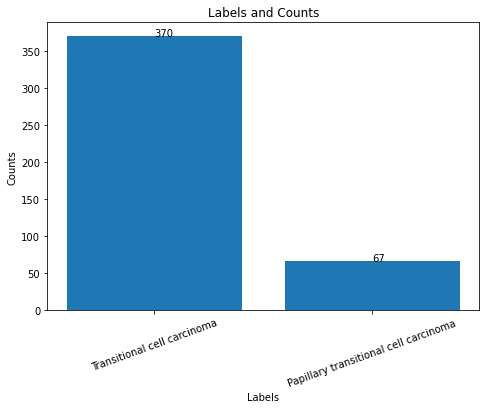

In [132]:
print('distribution of data is' +'\n', Y["primary_diagnosis"].value_counts())
# ploting
counts = Y['primary_diagnosis'].value_counts().rename_axis('Cancer_type').reset_index(name='count')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(counts['Cancer_type'],counts['count'])
addlabels(counts['Cancer_type'],counts['count'])
plt.title("Labels and Counts")
# giving X and Y labels
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.xticks(rotation=20)
plt.show()

In [84]:
# Solution2: delete the labels with only one sample
# for index,row in Y.iterrows():
#     if row['primary_diagnosis']== 'Squamous cell carcinoma, NOS' or row['primary_diagnosis']== 'Papillary adenocarcinoma, NOS' or row['primary_diagnosis']== 'Carcinoma, NOS':
#         Y = Y.drop(index)
#         df1 = df1.drop(index)

In [131]:
# solution3: merge the labels that only have one sample
# for index,row in Y.iterrows():
#     if row['primary_diagnosis']== 'Squamous cell carcinoma, NOS' or row['primary_diagnosis']== 'Papillary adenocarcinoma, NOS' or row['primary_diagnosis']== 'Carcinoma, NOS':
#         row['primary_diagnosis'] = 'NOS'

In [133]:
# transform the labels
ord_enc = OrdinalEncoder()
Y["classes"] = ord_enc.fit_transform(Y)
Y

,primary_diagnosis,classes
0,Transitional cell carcinoma,1.0
1,Transitional cell carcinoma,1.0
2,Papillary transitional cell carcinoma,0.0
3,Transitional cell carcinoma,1.0
4,Transitional cell carcinoma,1.0
...,...,...
435,Transitional cell carcinoma,1.0
436,Transitional cell carcinoma,1.0
437,Transitional cell carcinoma,1.0
438,Papillary transitional cell carcinoma,0.0


In [134]:
classes=Y["classes"]
labels = np_utils.to_categorical(classes)
print(labels[:10])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [135]:
X= df1.drop(columns='barcode')
X

,0,1,2,3,4,5,6,7,8,9,...,485567,485568,485569,485570,485571,485572,485573,485574,485575,485576
0,0.113423,NaN,NaN,0.544652,0.885131,0.609589,0.770944,0.186264,0.136881,0.013661,...,0.678325,0.013738,0.428950,0.012375,0.491295,0.448287,0.968589,0.972004,0.031403,0.695024
1,0.099730,NaN,NaN,0.148994,0.922959,0.413294,0.372003,0.239830,0.120519,0.014739,...,0.268836,0.011944,0.390979,0.249778,0.968720,0.954569,0.841370,0.486099,0.039529,0.941798
2,0.056009,NaN,NaN,0.317977,0.920201,0.775024,0.835618,0.524901,0.076580,0.009685,...,0.965567,0.971862,0.397083,0.014208,0.513809,0.949389,0.975109,0.031084,0.027022,0.950084
3,0.060058,NaN,NaN,0.918319,0.915577,0.629948,0.414251,0.180653,0.116935,0.014936,...,0.957051,0.959973,0.464705,0.964441,0.429494,0.026310,0.959222,0.599271,0.538583,0.323739
4,0.485065,NaN,NaN,0.237931,0.819894,0.602858,0.774802,0.311877,0.365804,0.010055,...,0.022895,0.978635,0.433584,0.015292,0.510258,0.028341,0.970803,0.960043,0.505847,0.629377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.081517,NaN,NaN,0.671883,0.904699,0.565229,0.498607,0.192700,0.163877,0.011965,...,0.479683,0.013308,0.934992,0.971824,0.971635,0.069478,0.967403,0.032046,0.469141,0.887821
436,0.213729,NaN,NaN,0.810521,0.917183,0.716093,0.294434,0.430439,0.144411,0.014108,...,0.477764,0.018287,0.037344,0.422347,0.018703,0.453043,0.966045,0.058355,0.037629,0.960440
437,0.086982,NaN,NaN,0.844741,0.902388,0.725393,0.766345,0.570679,0.123828,0.012372,...,0.461537,0.015342,0.929281,0.516270,0.476267,0.937414,0.542513,0.032574,0.032202,0.712569
438,0.311107,NaN,NaN,0.745250,0.926466,0.758472,0.867242,0.450476,0.253167,0.017181,...,0.022032,0.974275,0.260706,0.739950,0.970554,0.962769,0.626702,0.662861,0.956191,0.413733


In [138]:
# delete the columns that contains all the same value
X1 = X[[c for c in list(X)
       if len(X[c].unique())>1]]
len(X1.columns)

396065

In [139]:
X1.isna().sum().sum()

119307

In [140]:
# drop the coloumns which contains too many NAN
X2 = X1.dropna(thresh= 5, axis=1)
X2 = X1.fillna(X1.mean())
X2.isna().sum().sum()

0

In [141]:
X3 = X1[[c for c in list(X2)
       if (X2[c]==0).sum()/len(X1)<=0.1]]
X3.shape

(437, 396065)

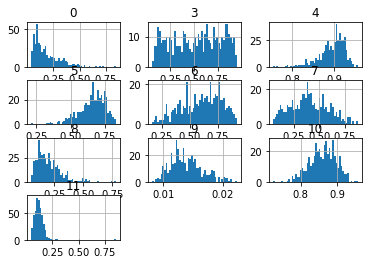

In [116]:
#Plot a histogram for the first 20 features
sub_X2 = X2.iloc[:,:10]
sub_X2.hist(bins=50)
plt.show()

In [156]:
# normalization
scaler =  preprocessing.StandardScaler().fit(X2)
data = scaler.transform(X2)
print(data)

[[-0.56800235  0.10057111 -0.28408809 ...  1.51134344 -1.2537133
  -0.42397884]
 [-0.68019007 -1.45252403  0.93643616 ...  0.04877803 -1.22924561
   0.59713662]
 [-1.03841741 -0.78920749  0.84746703 ... -1.32080901 -1.26690486
   0.63142321]
 ...
 [-0.78464591  1.27852359  0.27269149 ... -1.31632329 -1.25130989
  -0.35138103]
 [ 1.05172941  0.88798912  1.04958854 ...  0.58082918  1.53085253
  -1.58792534]
 [-0.24827576  0.85217425  1.45287079 ...  0.59286829  0.45863862
   0.66081719]]


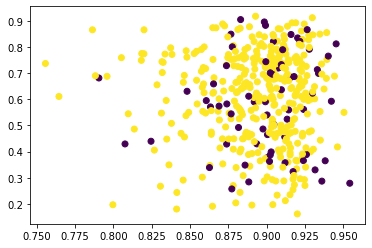

In [157]:
# visulaize the data
plt.scatter(X2.iloc[:,2],X2.iloc[:,4],c=classes)

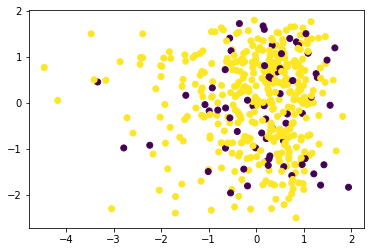

In [158]:
plt.scatter(data[:,2],data[:,4],c=classes)

In [159]:
#Data spliting
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42) 
print(y_train.shape)
print(x_train.shape)
print(x_train.shape[1])


(305, 2)
(305, 396065)
396065


<font size=5>Building the model</font>

In [161]:
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from keras import regularizers
def creat_model():
    opt = 'SGD'
    # Create & train the Deep MLP model with 2 hidden layers  
    model = Sequential()

    # Add the hidden layers and the regulizers
    nb_features = data.shape[1]
    
    ############## input layer ############
    # simple one
    model.add(Dense(10,input_dim = nb_features,activation='relu'))
    # add noise
    model.add(GaussianNoise(0.1))
    
    ######## hidden layer 1 ###########
    # simple one
    model.add(Dense(8, activation='relu'))
    # add noise
    model.add(GaussianNoise(0.1))
    
    ######## hidden layer 2 #############
    # simple one
    model.add(Dense(6, activation='relu'))
    # add noise
    model.add(GaussianNoise(0.1))
  
    ########## output layer ###########
    # simple one
    model.add(Dense(5, activation='softmax'))
    

    # Compile the model for a multi-class classification problem
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


<font size=4>Running the model</font>

In [162]:
model = creat_model()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 150, epochs=150, verbose=0)

In [163]:
# Evalute the model
score = model.evaluate(x_test, y_test, batch_size = 150, verbose = 1)
print("Scores on test set: loss=%s accuracy=%s" % tuple(score))


1/1 [==============================] - 0s 175ms/step - loss: 0.6690 - accuracy: 0.8030
Scores on test set: loss=0.6690089702606201 accuracy=0.8030303120613098


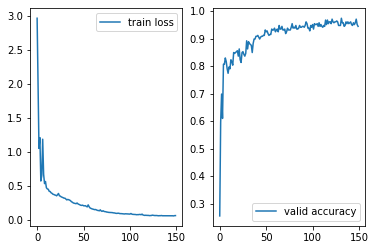

In [164]:
# plot the train loss and the validation loss
plt.figure(1)
plt.subplot(1,2,1)
out = np.asarray(history.history['loss'])
plt.plot(out, label = 'train loss')
plt.legend()

plt.subplot(1,2,2)
out = np.asarray(history.history['accuracy'])
plt.plot(out, label = 'valid accuracy')
plt.legend()

plt.show()

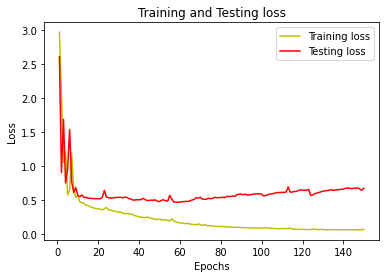

In [165]:
loss= history.history['loss']
val_loss= history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label= 'Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

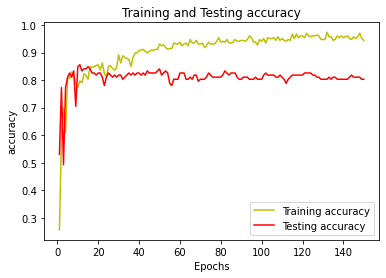

In [166]:
accuracy= history.history['accuracy']
val_accuracy= history.history['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'y',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label= 'Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [167]:
print('trainning loss:{} \n testing loss:{}'.format(loss[-1],val_loss[-1]))
print('trainning accuracy:{} \n testing accuracy:{}'.format(accuracy[-1],val_accuracy[-1]))

trainning loss:0.06201239302754402 
 testing loss:0.6690089702606201
trainning accuracy:0.9442622661590576 
 testing accuracy:0.8030303120613098
